<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Полезные-ссылки:" data-toc-modified-id="Полезные-ссылки:-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Полезные ссылки:</font></a></span></li></ul></li><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li><li><span><a href="#Загрузка-данных-и-их-ресемплирование." data-toc-modified-id="Загрузка-данных-и-их-ресемплирование.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка данных и их ресемплирование.</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных." data-toc-modified-id="Загрузка-данных.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Загрузка данных.</a></span></li><li><span><a href="#Ресемплирование-данных." data-toc-modified-id="Ресемплирование-данных.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Ресемплирование данных.</a></span></li></ul></li><li><span><a href="#Анализ-данных." data-toc-modified-id="Анализ-данных.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных.</a></span></li><li><span><a href="#Обучение-моделей." data-toc-modified-id="Обучение-моделей.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение моделей.</a></span><ul class="toc-item"><li><span><a href="#Создание-признаков." data-toc-modified-id="Создание-признаков.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Создание признаков.</a></span></li><li><span><a href="#Разделение-данных-на-выборки." data-toc-modified-id="Разделение-данных-на-выборки.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Разделение данных на выборки.</a></span></li><li><span><a href="#Модель-LinearRegression." data-toc-modified-id="Модель-LinearRegression.-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Модель LinearRegression.</a></span></li><li><span><a href="#Модель-RandomForestRegressor." data-toc-modified-id="Модель-RandomForestRegressor.-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Модель RandomForestRegressor.</a></span></li><li><span><a href="#Модель-CatBoostRegressor." data-toc-modified-id="Модель-CatBoostRegressor.-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Модель CatBoostRegressor.</a></span></li><li><span><a href="#Модель-LGBMRegressor." data-toc-modified-id="Модель-LGBMRegressor.-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Модель LGBMRegressor.</a></span></li></ul></li><li><span><a href="#Проверка-качества-лучшей-модели-на-тестовой-выборке." data-toc-modified-id="Проверка-качества-лучшей-модели-на-тестовой-выборке.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка качества лучшей модели на тестовой выборке.</a></span><ul class="toc-item"><li><span><a href="#Проверка-модели-на-вменяемость." data-toc-modified-id="Проверка-модели-на-вменяемость.-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Проверка модели на вменяемость.</a></span></li></ul></li><li><span><a href="#Общий-вывод-по-исследованию:" data-toc-modified-id="Общий-вывод-по-исследованию:-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод по исследованию:</a></span></li></ul></div>

<div class="alert alert-info"><b>Описание проекта:</b>
   
<b>"Прогноз количества заказов такси в аэропортах на следующий час"</b>

***

**Цели проекта:**
- построить модель, которая умеет предсказывать количество заказов такси на следующий час.
    
***
    
**Задачи исследования:**  
- на основании имеющихся данных о заказах такси в аэропортах, построить модель, которая умеет предсказывать количество заказов такси на следующий час;
- оценить качество модели, используя метрику RMSE (значение метрики RMSE на тестовой выборке должно быть не больше 48).    

***
    
**Этапы исследования:** 
* загрузка данных и их ресемплирование по одному часу
* анализ данных
* обучение разных моделей с различными гиперпараметрами (размер тестовой выборки - 10% от исходных данных)
* проверка данных на тестовой выборке 
* вывод по исследованию
    
***
<b>Признаки:</b>
* num_orders — число заказов

</div>

***

### Загрузка данных и их ресемплирование.

#### Загрузка данных.

In [3]:
import warnings
import os

import pandas as pd
import numpy as np
import lightgbm as lgb

from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression 
from numpy import arange
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import (
    train_test_split,    
    RandomizedSearchCV,
    TimeSeriesSplit,
    cross_val_score
)

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

# Избавляемся от вывода предупреждений
warnings.simplefilter("ignore")

# Отображение всех колонок
pd.set_option('display.max_columns', None)

# Константы
RANDOM_STATE = 12345

In [4]:
# Открываем файл с данными. Признак 'datetime' приведем к типу datetime64[ns].

pth1 = 'C:/Датасеты и проекты/taxi.csv'
pth2 = '/datasets/taxi.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1, parse_dates=[0])
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, parse_dates=[0])
else:
    print('Something is wrong')

In [5]:
# Выводим первые 5 строк датасета с данными.
data.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [6]:
# Получение информации о датасете.
data_all = [data]
data_names = ['Данные о заказах такси']

for i in range(len(data_all)):
        print(f'Количество строк и столбцов в датасете "{data_names[i]}": {data_all[i].shape}')
        print('-' * 30)
        print(f'Пропуски в датасете "{data_names[i]}":\n{data_all[i].isna().sum()}')
        print('-' * 30)
        print(f'Информация о типах данных в датасете "{data_names[i]}":\n{data_all[i].dtypes}')
        print('-' * 30)
        print('Распределение численных значений признаков в датасете:')
        display(data_all[i].describe().T)
        print('-' * 30)
        print(f'Количество явных дубликатов в датасете: {data_all[i].duplicated().sum()}')
        print('<-->' * 15,'\n')        

Количество строк и столбцов в датасете "Данные о заказах такси": (26496, 2)
------------------------------
Пропуски в датасете "Данные о заказах такси":
datetime      0
num_orders    0
dtype: int64
------------------------------
Информация о типах данных в датасете "Данные о заказах такси":
datetime      datetime64[ns]
num_orders             int64
dtype: object
------------------------------
Распределение численных значений признаков в датасете:


,count,mean,std,min,25%,50%,75%,max
num_orders,26496.0,14.070463,9.21133,0.0,8.0,13.0,19.0,119.0


------------------------------
Количество явных дубликатов в датасете: 0
<--><--><--><--><--><--><--><--><--><--><--><--><--><--><--> 



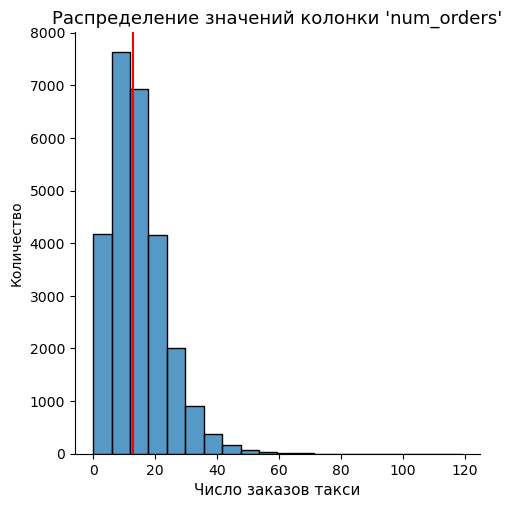

In [7]:
sns.displot(data,
            x = "num_orders",
            bins=20,
           )
plt.title("Распределение значений колонки 'num_orders'", size=13)
plt.xlabel("Число заказов такси", size=11)
plt.ylabel("Количество", size=10)
plt.axvline(x=data.num_orders.median(),
            color='red');

 <div class="alert alert-info"><b>Наблюдения:</b>
   
По результатам получения информации о датасете наблюдаем:
* пропусков в признаках не имеется
* типы данных к колонках соответсвуют содержимому
* явные дубликаты отсутствуют
    
</div>

#### Ресемплирование данных.

In [8]:
# Конвертируем колонку 'datetime' в значения индексов, проверим, расположены ли даты и время в хронологическом порядке.

data.set_index('datetime', inplace=True)
data.index.is_monotonic

True

 <div class="alert alert-info"><b>Наблюдения:</b>
   
Даты и время расположены в хронологическом порядке.
    
</div>

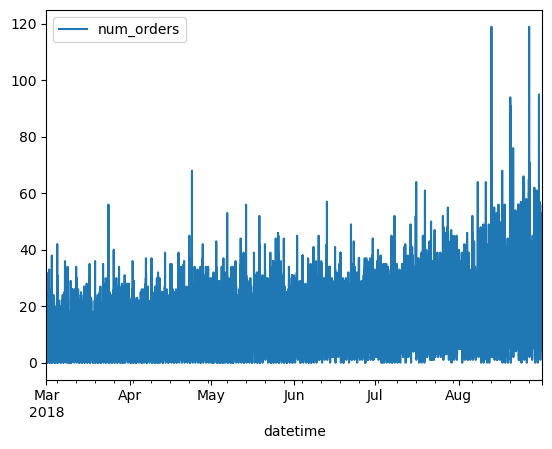

In [9]:
# Построим график временного ряда.
data.plot();

In [10]:
data = data.resample('1H').sum()
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


 <div class="alert alert-info"><b>Промежуточные выводы:</b>
   
Так как целью проекта является построение модели, которая умеет предсказывать количество заказов такси на следующий час для привлечения большего количества водителей в период пиковой нагрузки, оставим данные как есть, без отсечения самых высоких значений, в качестве способа аггрегирования данных при ресемплировании используем сумму.
    
</div>

### Анализ данных.

In [11]:
print('Начальная дата:', data.index.min())
print('Конечная дата:', data.index.max())
print('Продолжительность:', data.index.max() - data.index.min())

Начальная дата: 2018-03-01 00:00:00
Конечная дата: 2018-08-31 23:00:00
Продолжительность: 183 days 23:00:00


 <div class="alert alert-info"><b>Наблюдения:</b>
   
Данные представлены за полугодовой период: с 1 марта по 31 августа 2018 года (183 дня).
    
</div>

In [12]:
# Разложим временной ряд на тренд и сезонную компоненту.
decomposed = seasonal_decompose(data)

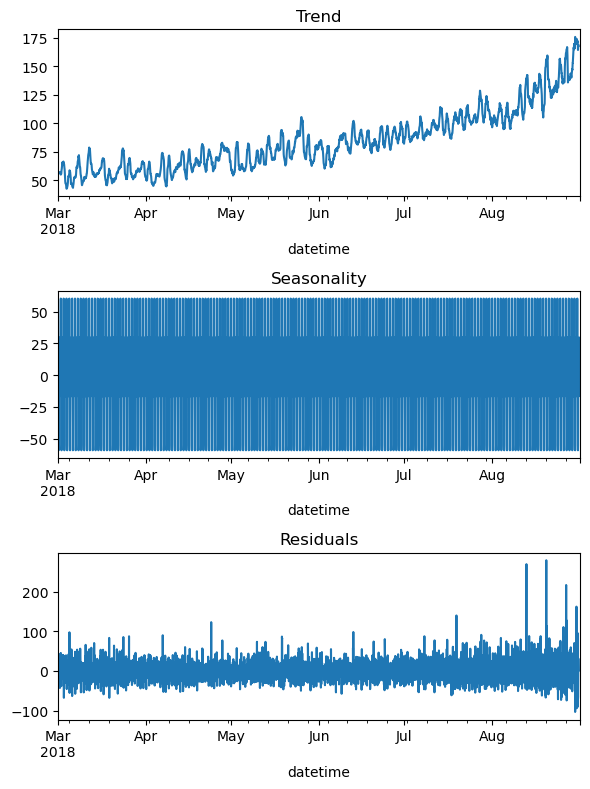

In [13]:
plt.figure(figsize=(6, 8))
plt.subplot(311)

decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())

plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())

plt.title('Residuals')
plt.tight_layout()

 <div class="alert alert-info"><b>Комментарий:</b>
   
* Временной ряд нестационарный, поскольку у него меняется среднее значение.
* тренд восходящий (по всей видимости это связано с развитием бизнеса).
* сезонность отражает высокую частоту данных, поэтому для более качественного изучения закономерностей необходимо изменить масштаб данных.
    
</div>

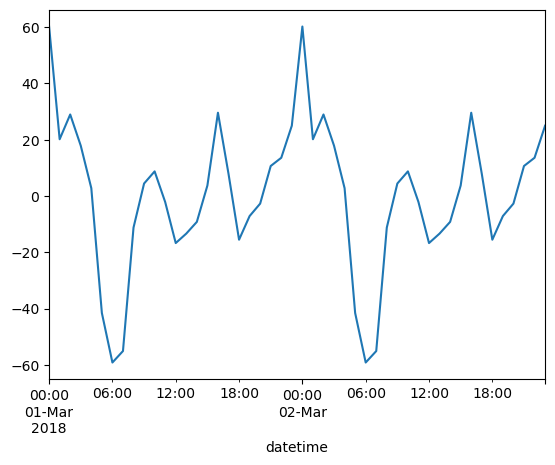

In [14]:
# Исследуем сезонность в течение суток.
decomposed.seasonal['2018-03-01': '2018-03-02'].plot();

 <div class="alert alert-info"><b>Промежуточные выводы:</b>   
    
По итогам анализа данных прослеживается зависимость количества заказов такси в течение суток от времени: в 06:00 количество заказов минимально, в 00:00 количество заказов максимальное.

</div>

### Обучение моделей.

#### Создание признаков.

In [15]:
# Создадим признаки, размер отставания (max_lag) при вызове функции укажем 24 (по количеству часов в сутках), 
# а ширину окна скользящего среднего - 10

def make_features(data, max_lag, rolling_mean_size):
    data_work = data.copy()
    data_work['dayofweek'] = data_work.index.dayofweek
    data_work['day'] = data_work.index.day
        
    for lag in range(1, max_lag + 1):
        data_work['lag_{}'.format(lag)] = data_work['num_orders'].shift(lag)

    data_work['rolling_mean'] = data_work['num_orders'].shift().rolling(window = rolling_mean_size).mean()
    return data_work

data_work = make_features(data, 24, 10)
data_work.head()

,num_orders,dayofweek,day,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,1,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,1,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,1,66.0,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Разделение данных на выборки.

In [16]:
# Разобьем данные на обучающую и тестовую выборки.
train, test = train_test_split(data_work, shuffle=False, test_size=0.1)
train = train.dropna()
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-02 00:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


In [17]:
# В качестве целевого признака выбираем 'num_orders'.

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

In [18]:
# Масштабируем числовые значения признаков в обучающей и тестовой выборках.
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

#### Модель LinearRegression.

In [19]:
%%time

# Для кросс-валидации временных рядов используем TimeSeriesSplit.
my_cv = TimeSeriesSplit(n_splits=3).split(features_train)

model_lr_cv = LinearRegression()

nrmse = cross_val_score(model_lr_cv,
                        features_train,
                        target_train,
                        scoring='neg_root_mean_squared_error',
                        cv=my_cv
                       )                               

print('Среднее значение RMSE модели LinearRegression на кросс-валидации:', nrmse.mean()*(-1))

Среднее значение RMSE модели LinearRegression на кросс-валидации: 27.735811161647835
Wall time: 171 ms


#### Модель RandomForestRegressor.

In [20]:
# Подберем гиперпараметры для модели RandomForestRegressor.
my_cv = TimeSeriesSplit(n_splits=3).split(features_train)

parameters = {'n_estimators': range(5, 21, 5),
              'max_depth': range(1, 20, 3), 
              'min_samples_leaf': range(1, 5, 2), 
              'min_samples_split': range(2, 8, 2)}

model_forest = RandomForestRegressor(random_state=RANDOM_STATE)

model_forest_cv = RandomizedSearchCV(model_forest,
                                     parameters,
                                     cv=my_cv,
                                     n_jobs=-1,
                                     scoring='neg_root_mean_squared_error'
                                    )

In [21]:
%%time

# Обучение модели. 
model_forest_cv.fit(features_train, target_train)
print('Значение метрики RMSE модели RandomForestRegressor:', -model_forest_cv.best_score_)

Значение метрики RMSE модели RandomForestRegressor: 28.041813594651558
Wall time: 9.22 s


#### Модель CatBoostRegressor.

In [22]:
# Подберем гиперпараметры для модели CatBoostRegressor.
my_cv = TimeSeriesSplit(n_splits=3).split(features_train)

cbr = CatBoostRegressor(loss_function='RMSE', silent=True, random_state=RANDOM_STATE)

cbr_params = {'learning_rate': arange(.1, 1, .1),
              'n_estimators': range(50, 401, 50),
              'depth': range(1, 10, 2),
             }

grid_cbr = RandomizedSearchCV(cbr,
                              cbr_params,
                              cv=my_cv,
                              n_jobs=-1,
                              scoring='neg_root_mean_squared_error'
                             )

In [23]:
%%time
# Обучение модели.
grid_cbr.fit(features_train, target_train)
print('Значение метрики RMSE модели CatBoostRegressor:', -grid_cbr.best_score_)

Значение метрики RMSE модели CatBoostRegressor: 26.98867921685772
Wall time: 50.3 s


#### Модель LGBMRegressor.

In [24]:
# Подберем гиперпараметры для модели LGBMRegressor.
my_cv = TimeSeriesSplit(n_splits=3).split(features_train)

lgbmr = LGBMRegressor(silent=True,
                      force_row_wise=True,
                      random_state=RANDOM_STATE
                     )

lgbmr_params = {'learning_rate': arange(.1, 1, .1),
                'n_estimators': range(50, 401, 50),
                'max_depth': range(1, 10, 2),
               }

grid_lgbmr = RandomizedSearchCV(lgbmr,
                                lgbmr_params,
                                cv=my_cv,
                                n_jobs=-1,
                                scoring='neg_root_mean_squared_error'
                               )

In [25]:
%%time
# Обучение модели
grid_lgbmr.fit(features_train, target_train)
print('Значение метрики RMSE модели LGBMRegressor:', -grid_lgbmr.best_score_)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 3950, number of used features: 27
[LightGBM] [Info] Start training from score 78.421013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

 <div class="alert alert-info"><b>Промежуточные выводы:</b>   
    
По результатам сравнения качества моделей минимальное значение RMSE у модели CatBoostRegressor (grid_cbr), ее и будем проверять на тестовой выборке.

</div>

***

### Проверка качества лучшей модели на тестовой выборке.

In [26]:
%%time
# Проверим качество выбранной модели CatBoostRegressor на тестовой выборке.
target_predict_test = grid_cbr.predict(features_test)
rmse_test = mean_squared_error(target_test, target_predict_test, squared=False)
print('Значение метрики RMSE выбранной модели CatBoostRegressor:', rmse_test)

Значение метрики RMSE выбранной модели CatBoostRegressor: 42.33567415853422
Wall time: 4.99 ms


 <div class="alert alert-info"><b>Комментарий:</b>
   
Значение метрики RMSE выбранной модели CatBoostRegressor: 42.33567415853422, что соответствует условию задачи (значение метрики RMSE на тестовой выборке должно быть не больше 48).
    
</div>

#### Проверка модели на вменяемость.

In [27]:
%%time

# Используем DummyRegressor.
# Обучим модель DummyRegressor на обучающей выборке с кодированием OHE. Предскажем на тестовой выборке.

model_dummy = DummyRegressor()
model_dummy.fit(features_train, target_train)
dummy_predict = model_dummy.predict(features_test)
print(f'Значение метрики RMSE модели DummyRegressor: {mean_squared_error(target_test, dummy_predict, squared=False)}')

Значение метрики RMSE модели DummyRegressor: 84.6499381993622
Wall time: 995 µs


 <div class="alert alert-info"><b>Комментарий:</b>
   
Значение метрики RMSE выбранной модели CatBoostRegressor: 42.33567415853422.   
Значение метрики RMSE модели DummyRegressor: 84.6499381993622.    
Выбранная нами модель CatBoostRegressor показывает результат лучше случайного, модель может применяться.
    
</div>

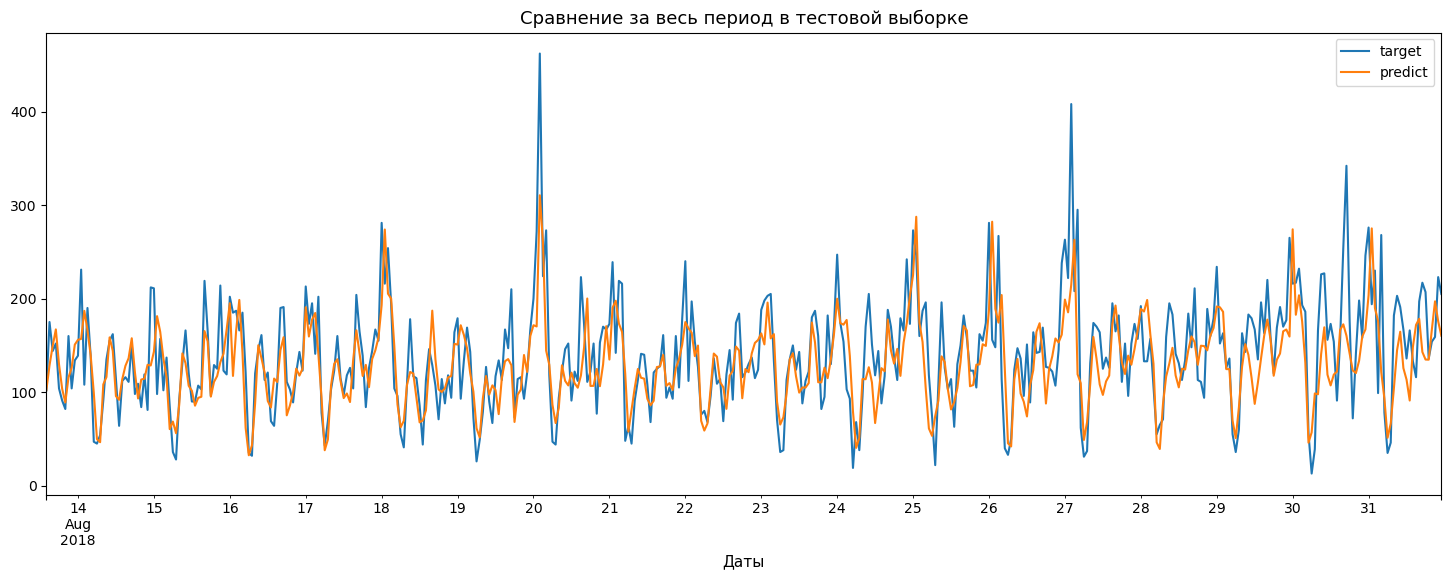

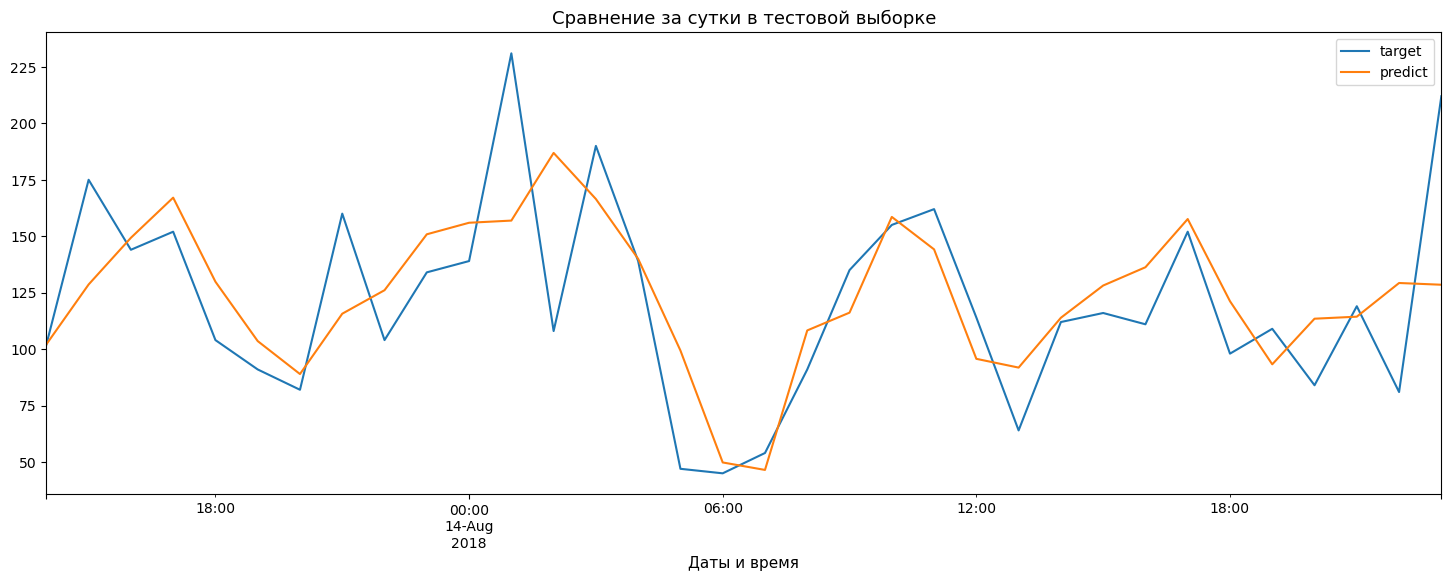

In [28]:
# Визуализируем графики исходного и предсказанных моделью CatBoostRegressor рядов.

def data_plot(predictions):
    model_data = pd.DataFrame({"target":target_test, "predict":predictions})
    model_data.plot(figsize=(18, 6))
    plt.title('Сравнение за весь период в тестовой выборке', size=13)
    plt.xlabel("Даты", size=11)
    model_data['2018-08-13':'2018-08-14'].plot(figsize=(18, 6))
    plt.title('Сравнение за сутки в тестовой выборке', size=13)
    plt.xlabel("Даты и время", size=11)

data_plot(target_predict_test)

***

 <div class="alert alert-info"><h3>Общий вывод по исследованию:</h3>
    
1. Согласно условия задачи на основании имеющихся данных о заказах такси в аэропортах необходимо было построить модель, которая умеет предсказывать количество заказов такси на следующий час. При этом качество модели необходимо оценить, используя метрику RMSE (значение метрики RMSE на тестовой выборке должно быть не больше 48).

2. В ходе исследования мною было проведено сравнение моделей ML: LinearRegression, RandomForestRegressor, LGBMRegressor, CatBoostRegressor с подбором гиперпараметров для минимизация значения метрики RMSE.
    
3. Проведя анализ необходимых критериев, в качестве лучшей я выбрал модель CatBoostRegressor, которую проверил на тестовой выборке. Значение метрики RMSE выбранной модели CatBoostRegressor: 42.33567415853422 (значение метрики RMSE на тестовой выборке должно быть не больше 48).
    
4. Также была проведена проверка модели CatBoostRegressor на вменяемость, по итогам которой модель CatBoostRegressor показала результат лучше случайного, модель может применяться.

</div>